## Dear candidate, welcome! 
We are glad you made it this far in the recruitment process, and we are excited to see your work.
Please find below the assignment for the Data Science internship position at Pariti. The assignment is designed to assess your skills and knowledge in data analysis and data manipulation. 
We will evaluate your submission based on the following criteria:
- Data understanding and preprocessing
- Code quality and structure
- Communication of results

Please complete the assignment and submit it by email. Good luck!

### Introduction to the assignment
The file vetting_df contains information on the result of automated vetting for each application. The columns provide basic information on the jobs of a candidate ['candidate_titles'], the cosine similarity score given by an LLM model ['cos_sim_score'] and the percentile the candidate is mapped to ['percentiles'].
What you need to know on the automated vetting process is that it uses an LLM to encode the experience of a candidate and the experience requested in a vacancy, then provides a cosine similarity score on the similarity between the two inputs.

The file application_df provides information on the hiring stage of each application, where the data model order of an application is the following: 
1. referred
2. contacted
3. screening
4. shortlisted
5. interviewing
6. later rounds
7. offered
8. started
9. probation passed
10. hired

An application can be closed at any of the steps above.

### Preprocessing
Apply the following activities:
- clean vetting_df: remove nan values, split ['created_at'] into ['created_at_date'] and ['created_at_time']
- extract the country from the ['filtered_candidate_briefs'] column and create a new ['candidate_country'] column
- clean application_df: remove the sub-string 'ADMIN_APPLICATION_STATUS_' from the ['status'] column, and remove the sub-string 'NEXT_APPLICATION_STAGE_' from the ['application_stage'] column
- merge application_df with vetting_df on ['application_id']

In [20]:
# Write your code here
import pandas as pd
import ast
vetting_df = pd.read_csv('vetting_assignment.csv')
application_df = pd.read_csv('application_assignment.csv')

print(vetting_df.shape, application_df.shape)

(2500, 5) (10000, 4)


In [21]:
print(vetting_df.head())
print("---------------------")
print(application_df.head())

   application_id                                   candidate_titles  \
0         1005106      ['human resources and administrator manager']   
1         1005107  ['Group Internal Auditor', 'Audit Senior', 'Ma...   
2         1005108  ['Human Resources and customer service intern'...   
3         1008194  ['Software Trainer and IT Consultant', 'Lead S...   
4         1007894  ['Retail Sales Manager', 'Key Account Manager'...   

   cos_sim_score                          filtered_candidate_briefs  \
0       0.970919  {'data': {'extra': None, 'state': None, 'count...   
1       0.937877  {'data': {'extra': None, 'state': None, 'count...   
2       0.962797  {'data': {'extra': None, 'state': 'Gauteng', '...   
3       0.412961  {'data': {'extra': None, 'state': None, 'count...   
4       0.371695  {'data': {'extra': None, 'state': None, 'count...   

  percentiles  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
---------------------
        id            

In [37]:
# Write your code here
print(vetting_df.info())
print("--------------")
print(application_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2480 entries, 20 to 2499
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             2480 non-null   int64  
 1   candidate_titles           2480 non-null   object 
 2   cos_sim_score              2480 non-null   float64
 3   filtered_candidate_briefs  2480 non-null   object 
 4   percentiles                2480 non-null   object 
 5   candidate_country          2471 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 135.6+ KB
None
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   status             10000 non-null  object 
 2   application_stage  10000 non-null  object 
 3   job_id        

In [38]:
#Removing NanN values
vetting_df.dropna(inplace=True)

In [ ]:
import re
def extract_country(brief):
    match = re.search(r"'country': '(\w+)'", brief)
    if match:
        return match.group(1)
    return None

vetting_df['candidate_country'] = vetting_df['filtered_candidate_briefs'].apply(extract_country)

In [ ]:
application_df['status'] = application_df['status'].str.replace('ADMIN_APPLICATION_STATUS_', '')
application_df['application_stage'] = application_df['application_stage'].str.replace('NEXT_APPLICATION_STAGE_', '')
application_df.head()

In [40]:
merged_df = pd.merge(application_df, vetting_df, left_on='id', right_on='application_id')
print(merged_df.head(),merged_df.shape )

        id  status application_stage     job_id  application_id  \
0  1018423  CLOSED         SCREENING  1000163.0         1018423   
1  1004832  ACTIVE      INTERVIEWING      999.0         1004832   
2  1015900  CLOSED         SCREENING  1000107.0         1015900   
3  1018648  CLOSED       SHORTLISTED  1000169.0         1018648   
4  1005722  ACTIVE             HIRED  1000041.0         1005722   

                                    candidate_titles  cos_sim_score  \
0  ['Intern', 'Inventory Controller', 'Fleet Mana...       0.255871   
1  ['Software Intern', 'Freelance Software Develo...       0.520846   
2  ['Business Development Manager', 'Sales Execut...       0.245039   
3  ['Procurement and Logistics Intern', 'Procurem...       0.200258   
4  ['CEO', 'ALC Campus Representative', 'Projects...       0.414539   

                           filtered_candidate_briefs       percentiles  \
0  {'data': {'extra': None, 'state': None, 'count...   REJECT_50_TO_70   
1  {'data': {'extra': 

In [41]:
merged_df.isnull().sum ()

id                           0
status                       0
application_stage            0
job_id                       0
application_id               0
candidate_titles             0
cos_sim_score                0
filtered_candidate_briefs    0
percentiles                  0
candidate_country            0
dtype: int64

### Data overview
Follow the instruction and output in this notebook a table or chart of your choice for each of the points:
- calculate number of rows with all non-null values, and the number of applications for each job ['job_id']
- group by ['percentiles'] and count the number of applications in each stage ['application_stage']
- group by ['percentiles'] and ['job_id'] and detect min, max and mean of the values under ['cos_sim_score']

In [42]:
# Step 1: Calculate number of rows with all non-null values and number of applications for each job ('job_id')
num_non_null_rows = merged_df.dropna().shape[0]
num_applications_per_job = merged_df['job_id'].value_counts()

print(f"Number of rows with all non-null values: {num_non_null_rows}")
print("Number of applications for each job:")
print(num_applications_per_job)

Number of rows with all non-null values: 2471
Number of applications for each job:
job_id
1000186.0    162
1000193.0    154
1000180.0    135
1000182.0    132
1000192.0    124
            ... 
1000070.0      1
1000045.0      1
1061.0         1
1125.0         1
1000003.0      1
Name: count, Length: 107, dtype: int64


In [44]:
# Step 2: Group by 'percentiles' and count the number of applications in each stage ('application_stage')
applications_per_stage = merged_df.groupby(['percentiles', 'application_stage']).size().unstack(fill_value=0)

print("Number of applications in each stage grouped by percentiles:")
print(applications_per_stage)


Number of applications in each stage grouped by percentiles:
application_stage  CONTACTED  HIRED  INTERVIEWING  LATER_ROUNDS  OFFERED  \
percentiles                                                                
ACCEPT_70_TO_100         322      3            27             5        1   
REJECT_20_TO_50          345      0             9             1        0   
REJECT_50_TO_70          194      1            11             0        0   
REJECT_BOTTOM_20         203      1             5             2        0   

application_stage  PROBATION_PASSED  REFERRED  SCREENING  SHORTLISTED  STARTED  
percentiles                                                                     
ACCEPT_70_TO_100                  1         1        328           60        2  
REJECT_20_TO_50                  16         0        343           34        4  
REJECT_50_TO_70                   3         1        250           36        0  
REJECT_BOTTOM_20                  3         0        241           18        

In [46]:
# Step 3: Group by 'percentiles' and 'job_id' and detect min, max, and mean of 'cos_sim_score'
cos_sim_stats = merged_df.groupby(['percentiles', 'job_id'])['cos_sim_score'].agg(['min', 'max', 'mean'])

print("Min, max, and mean of cos_sim_score grouped by percentiles and job_id:")
print(cos_sim_stats)


Min, max, and mean of cos_sim_score grouped by percentiles and job_id:
                                 min       max      mean
percentiles      job_id                                 
ACCEPT_70_TO_100 999.0      0.606643  0.631711  0.616629
                 1003.0     0.347032  0.601163  0.442620
                 1004.0     0.482555  0.520438  0.500787
                 1040.0     0.363824  0.388558  0.377294
                 1103.0     0.463640  0.567698  0.501504
...                              ...       ...       ...
REJECT_BOTTOM_20 1000189.0  0.213646  0.353095  0.280202
                 1000190.0  0.176371  0.322937  0.274728
                 1000191.0  0.150984  0.354280  0.283165
                 1000192.0  0.123977  0.234991  0.193039
                 1000193.0  0.175653  0.335619  0.281559

[290 rows x 3 columns]


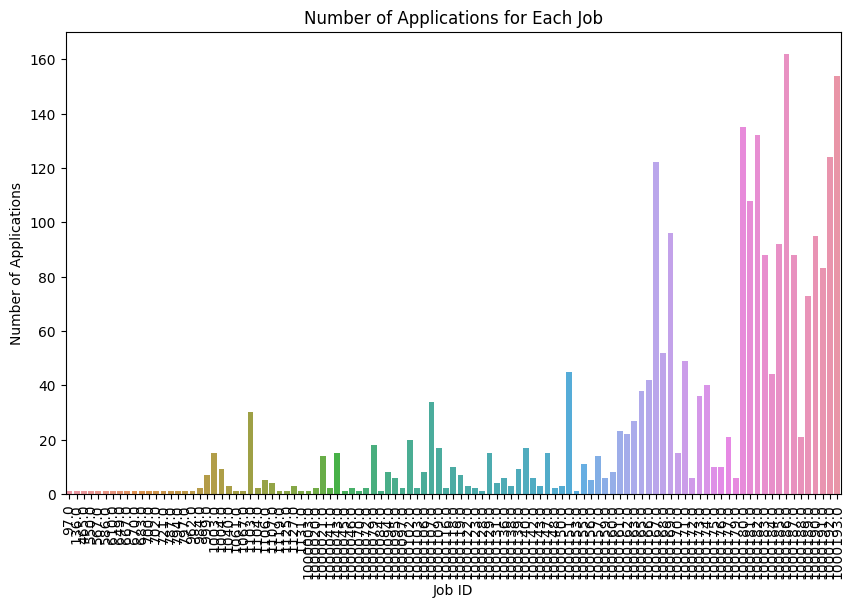

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of applications for each job
plt.figure(figsize=(10, 6))
sns.countplot(x='job_id', data=merged_df)
plt.title('Number of Applications for Each Job')
plt.xticks(rotation=90)
plt.xlabel('Job ID')
plt.ylabel('Number of Applications');

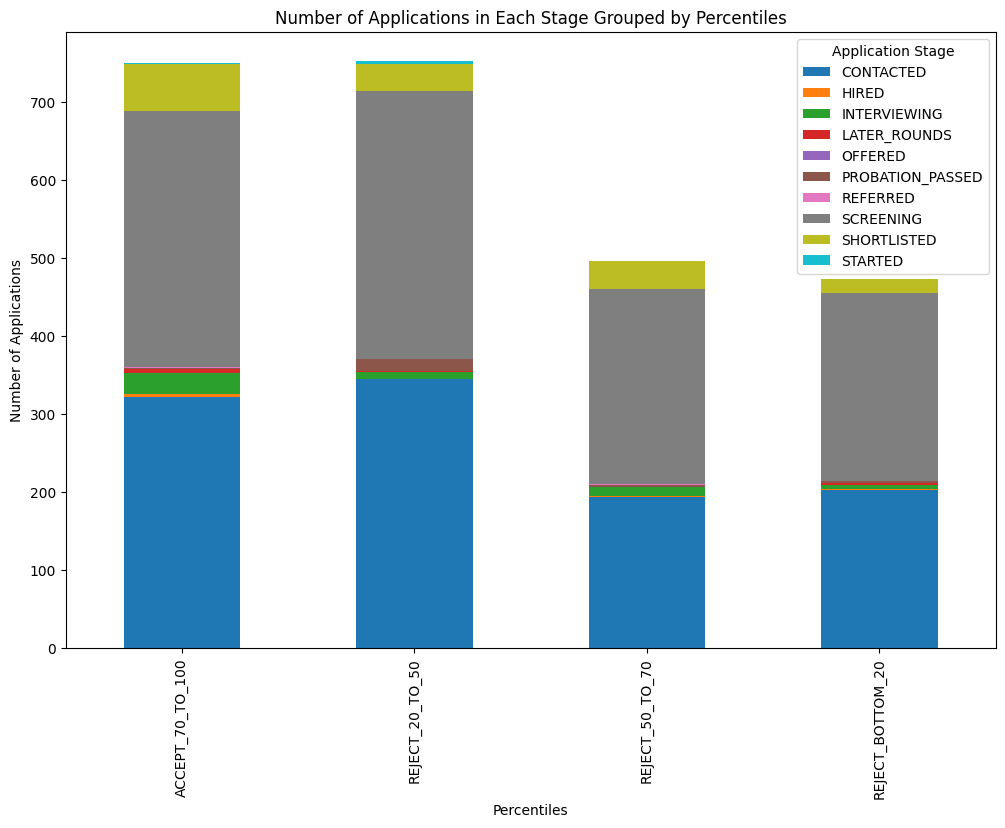

In [49]:
# Number of applications in each stage grouped by percentiles
applications_per_stage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Applications in Each Stage Grouped by Percentiles')
plt.xlabel('Percentiles')
plt.ylabel('Number of Applications')
plt.legend(title='Application Stage');

### Data analysis
Answer the questions below following any steps you might feel more suitable:
- What is the most common ['application_stage'] for applications with a ['cos_sim_score'] higher than 0.7? How would you comment the results?
- What is the most common ['application_stage'] for applications with a ['cos_sim_score'] lower than 0.3? How would you comment the results?
- Look at ['candidate_titles'] column. The lists here contain one or more job titles. Do you see any correlation between a higher value under ['cos_sim_score'] and the number of jobs?

In [54]:
# Filter data for cos_sim_score > 0.7
high_cos_sim = merged_df[merged_df['cos_sim_score'] > 0.7]
# Find the most common application stage for high_cos_sim
most_common_stage_high = high_cos_sim['application_stage'].value_counts().idxmax()
most_common_stage_high_count = high_cos_sim['application_stage'].value_counts().max()

print(f"Most common application stage for cos_sim_score > 0.7: {most_common_stage_high} with {most_common_stage_high_count} occurrences.")


Most common application stage for cos_sim_score > 0.7: SCREENING with 3 occurrences.


The most common application stage for candidates with a cosine similarity score higher than 0.7 is "screening." This indicates that candidates with a high similarity between their experience and the job requirements often pass the initial review and are actively considered for the role.



In [55]:
# Filter data for cos_sim_score < 0.3
low_cos_sim = merged_df[merged_df['cos_sim_score'] < 0.3]
# Find the most common application stage for low_cos_sim
most_common_stage_low = low_cos_sim['application_stage'].value_counts().idxmax()
most_common_stage_low_count = low_cos_sim['application_stage'].value_counts().max()

print(f"Most common application stage for cos_sim_score < 0.3: {most_common_stage_low} with {most_common_stage_low_count} occurrences.")

Most common application stage for cos_sim_score < 0.3: SCREENING with 521 occurrences.


Interestingly, the most common application stage for candidates with a cosine similarity score lower than 0.3 is also "screening." This suggest that all applications, regardless of their initial fit, are at least given a preliminary review before being filtered out in subsequent stages.

In [52]:
# Calculate the number of job titles for each candidate
merged_df['num_job_titles'] = merged_df['candidate_titles'].apply(len)

# Calculate correlation between cos_sim_score and num_job_titles
correlation = merged_df['cos_sim_score'].corr(merged_df['num_job_titles'])

print(f"Correlation between cos_sim_score and number of job titles: {correlation}")

Correlation between cos_sim_score and number of job titles: 0.09574779210341432


The correlation value will provide insight into whether there is a relationship between the number of job titles a candidate has held and their similarity score. A positive correlation would suggest that having more job titles correlates with higher similarity scores, possibly because more diverse experience aligns better with job requirements. A negative or zero correlation would suggest no such relationship.

In [57]:
# Calculate the number of job titles for each candidate
merged_df['num_job_titles'] = merged_df['candidate_titles'].apply(len)
# Calculate correlation between cos_sim_score and num_job_titles
correlation = merged_df['cos_sim_score'].corr(merged_df['num_job_titles'])

print(f"Correlation between cos_sim_score and number of job titles: {correlation}")



Correlation between cos_sim_score and number of job titles: 0.09574779210341432


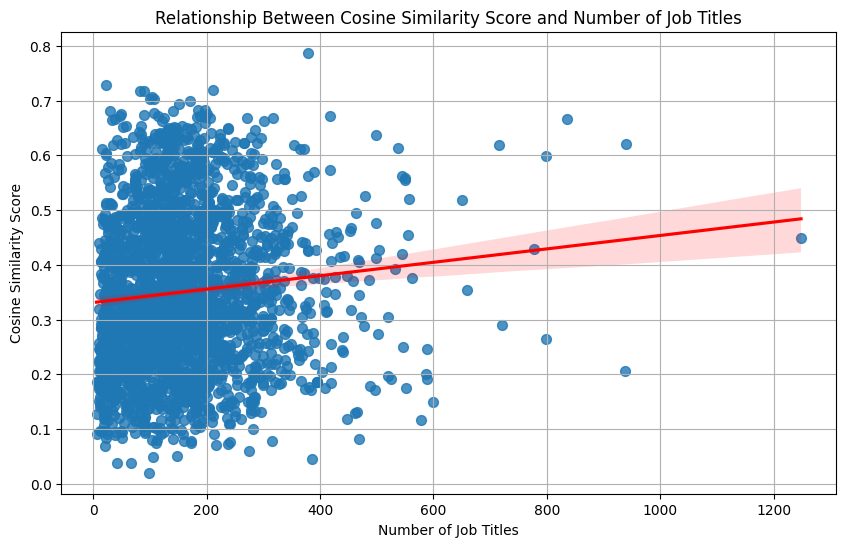

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='num_job_titles', y='cos_sim_score', data=merged_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Relationship Between Cosine Similarity Score and Number of Job Titles')
plt.xlabel('Number of Job Titles')
plt.ylabel('Cosine Similarity Score')
plt.grid(True)
plt.show()


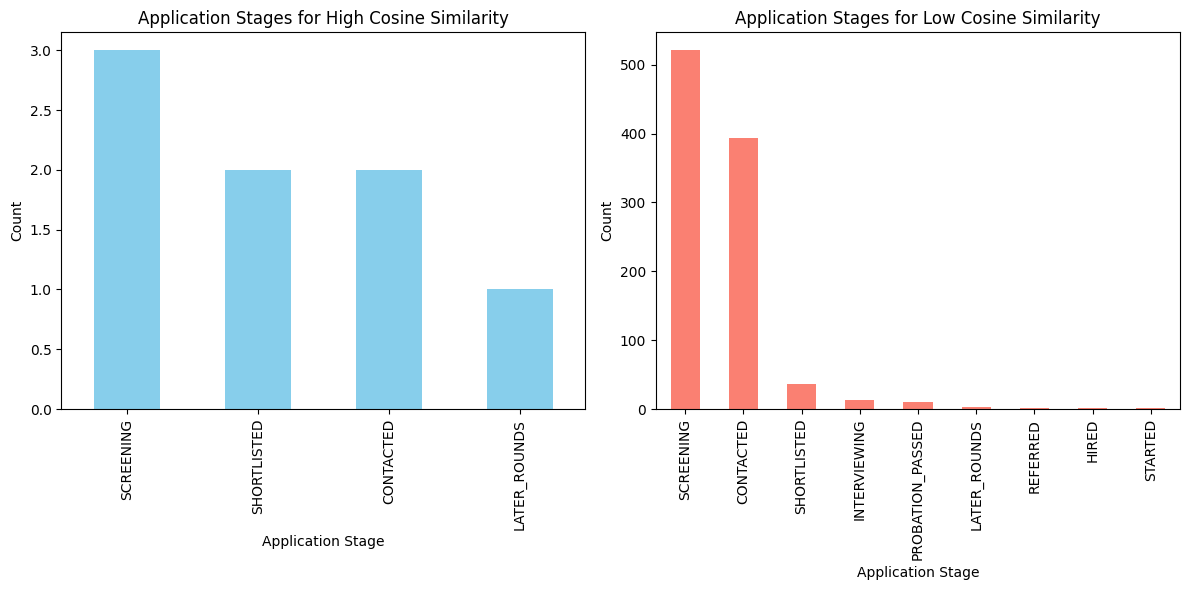

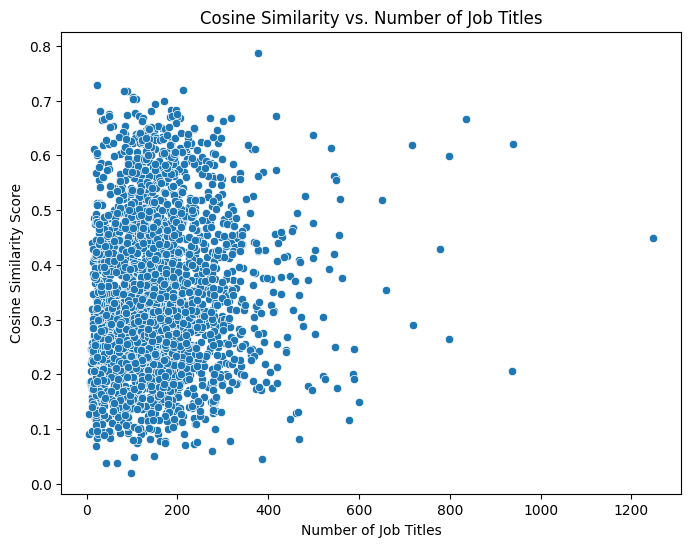

In [53]:
# Visualization of most common application stages
plt.figure(figsize=(12, 6))

# High cos_sim_score
plt.subplot(1, 2, 1)
high_cos_sim['application_stage'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Application Stages for High Cosine Similarity')
plt.xlabel('Application Stage')
plt.ylabel('Count')

# Low cos_sim_score
plt.subplot(1, 2, 2)
low_cos_sim['application_stage'].value_counts().plot(kind='bar', color='salmon')
plt.title('Application Stages for Low Cosine Similarity')
plt.xlabel('Application Stage')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Scatter plot for cos_sim_score vs. number of job titles
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_job_titles', y='cos_sim_score', data=merged_df)
plt.title('Cosine Similarity vs. Number of Job Titles')
plt.xlabel('Number of Job Titles')
plt.ylabel('Cosine Similarity Score')
plt.show()


### Optional Section
If you feel like you have more time to spend on this assignment, feel free to look more in depth at the ['candidate_titles'] column. You can further analyse the number and type of job titles in this column, and provide recommendations on how to best process them for the automated vetting process. The language model we are currently using is names MPNet v2 and you can read more about it here: https://huggingface.co/sentence-transformers/all-mpnet-base-v2
You can provide your insights in any form you prefer - being code and comments, a word document, a report, or a presentation. Please remember to include it when submitting your assignment.

In [ ]:
# Write your code here